# Cvičení 03
Vizualizace dat z webu IDNES.cz

In [26]:
import sys
sys.path.append("/Users/kirillefremov/development/PycharmProjects/TUL-TPB-2024-25")

import matplotlib.pyplot as plt
import pandas as pd
import re
import math

from collections import Counter, defaultdict
from pprint import pprint

import cv01.json_reader as json_reader
import cv02.analyzer as analyzer

In [27]:
filename = '/Users/kirillefremov/development/PycharmProjects/TUL-TPB-2024-25/cv01/idnes-data-output.json'

In [28]:
articles_json = json_reader.read_json(filename)
df = analyzer.preprocess(articles_json, drop_duplicates=True)
print(df.title.size)

113417


## 1. Vykreslete křivku zobrazující přidávání článků v čase

In [29]:
df['month'] = df['date'].dt.to_period('M')
articles_per_month = df.groupby('month').size().reset_index(name='articles_count')
articles_per_month['cum_articles'] = articles_per_month['articles_count'].cumsum()
articles_per_month['month'] = articles_per_month['month'].dt.to_timestamp()

/var/folders/51/0prm0g2x0y13rpfcls9fpv180000gn/T/ipykernel_29008/4064837459.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['date'].dt.to_period('M')


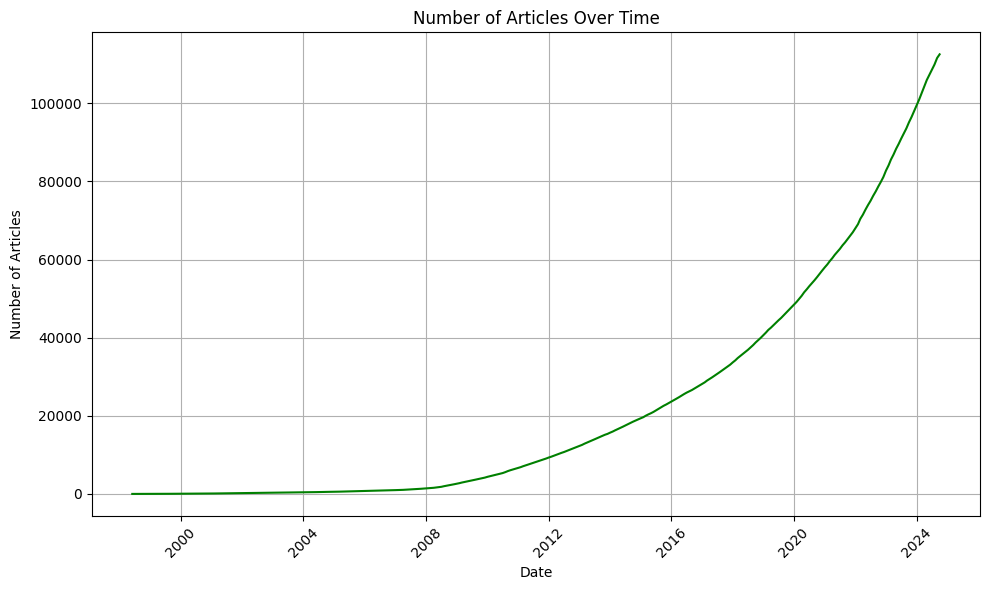

In [30]:
figure = plt.figure(figsize=(10, 6))
plt.plot(articles_per_month['month'], articles_per_month['cum_articles'], color='green')
plt.title('Number of Articles Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## 2. Vykreslete sloupcový graf zobrazující počet článků v jednotlivých rocích 

In [31]:
articles_per_year = df.groupby(df['date'].dt.year).size().reset_index(name='articles_count')
x = articles_per_year['date'].astype(int)
y = articles_per_year['articles_count']

[]

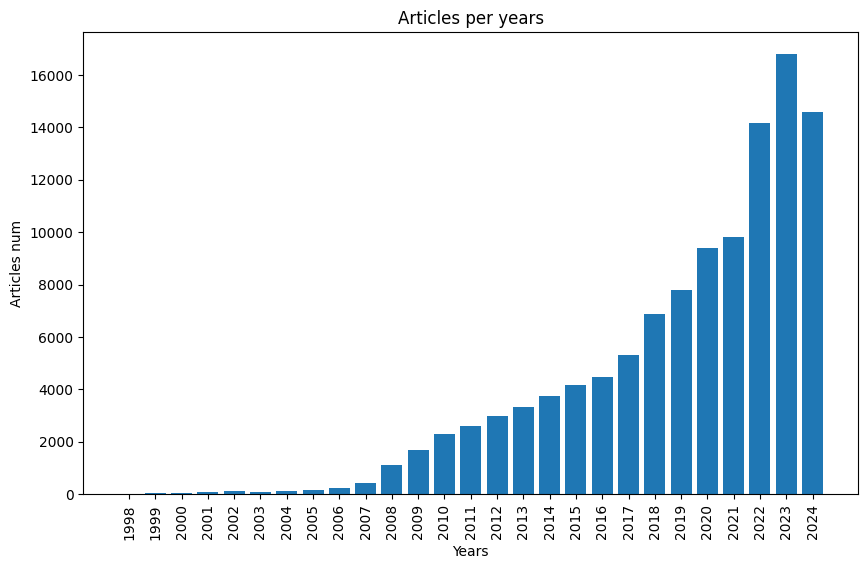

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Articles per years")
ax.set_xlabel("Years")
ax.set_ylabel("Articles num")
ax.bar(x, y, tick_label=x)
plt.xticks(rotation=90)
plt.plot()

## 3.  Vykreslete scatter graf zobrazující vztah mezi délkou článků a počtem komentářů

In [33]:
articles_lens = [len(text.split()) for text in df.text]
articles_comments = df.comments_num

[]

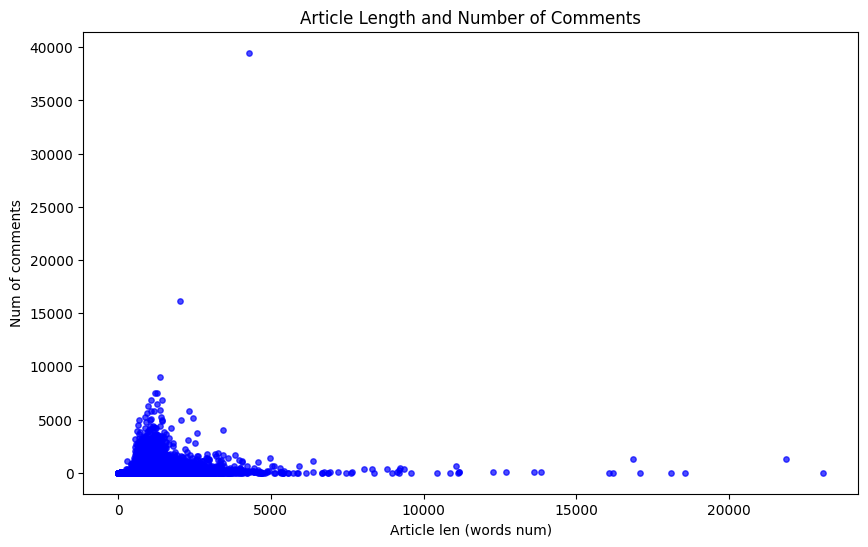

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(articles_lens, articles_comments, color='blue', alpha=0.7, s=15)
plt.title("Article Length and Number of Comments")
plt.xlabel("Article len (words num)")
plt.ylabel("Num of comments")
plt.plot()

## 4. Vykreslete koláčový graf zobrazující podíč článků v jednotlivých kategoriích

In [35]:
cats = [cat for cat_list in df.categories for cat in cat_list]
articles_per_cat_count = Counter(cats)
top_n = 20
top_categories = articles_per_cat_count.most_common(top_n)
top_categories_names = [cat[0] for cat in top_categories]
top_categories_counts = [cat[1] for cat in top_categories]

[]

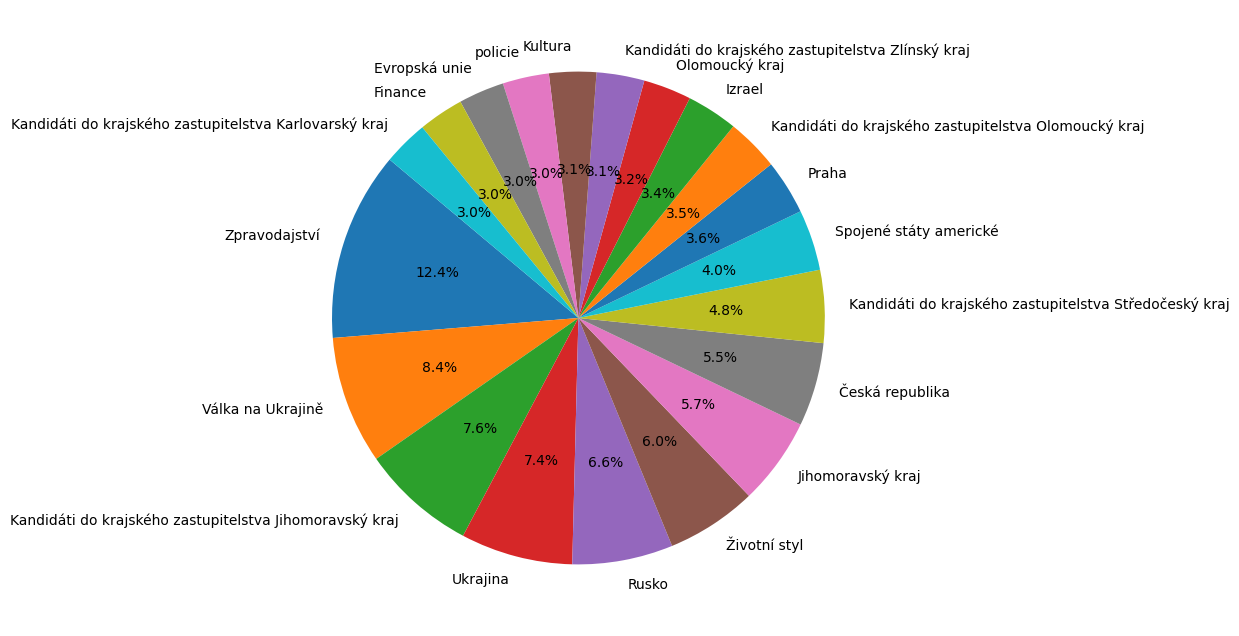

In [36]:
plt.figure(figsize=(14, 8))
plt.pie(top_categories_counts, labels=top_categories_names, autopct='%1.1f%%', startangle=140)
plt.plot()

## 5. Vykreslete histogram pro počet slov v článcích

In [37]:
articles_word_num = []
articles_word_len = []
for text in df.text:
    # 5
    words = re.findall(r'\b\w+\b', text.lower())
    articles_word_num.append(len(words))
    # 6
    lengthes = [len(w) for w in words]
    articles_word_len.append(sum(lengthes) / len(lengthes))

[]

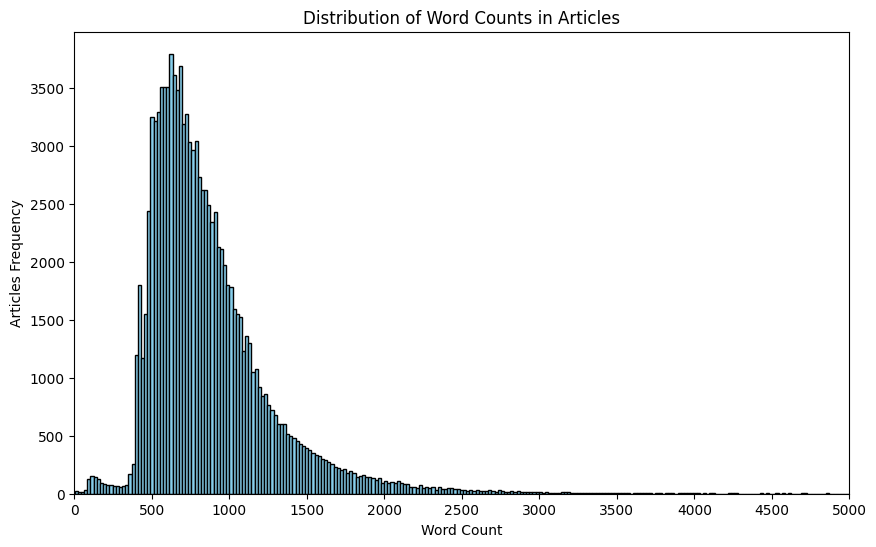

In [38]:
plt.figure(figsize=(10, 6))
plt.hist(articles_word_num, bins=len(articles_word_num) // 100, color='skyblue', edgecolor='black')
plt.xlim(0, 5000)
ticks = range(0, 5001, 500)
plt.xticks(ticks)
plt.title('Distribution of Word Counts in Articles')
plt.xlabel('Word Count')
plt.ylabel('Articles Frequency')
plt.plot()

## 6. Vykreslete histogram pro délku slov ve článcích

[]

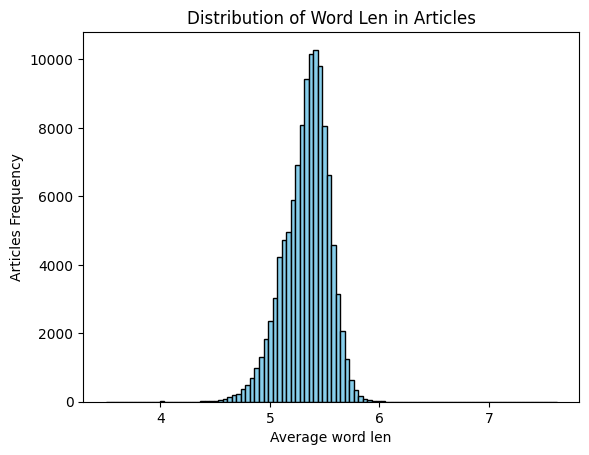

In [39]:
plt.figure()
plt.hist(articles_word_len, bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Word Len in Articles')
plt.xlabel('Average word len')
plt.ylabel('Articles Frequency')
plt.plot()

## 7. Vykreslete časovou osu zobrazující výskyt slova koronavirus v názvu článků

In [40]:
df_clean = df.dropna(subset=['date'])
print(df_clean['date'].isna().any())

False


In [41]:
covid_words_by_date = defaultdict(int)
vaccina_words_by_date = defaultdict(int)

for _, row in df_clean.sort_values(by="date").iterrows():
    covid_words = len(re.findall(r'\bkoronavirus\b', row['text'].lower()))
    vaccina_words = len(re.findall(r'\bvakcína\b', row['text'].lower()))
    str_date = row['date'].year
    covid_words_by_date[str_date] += covid_words
    vaccina_words_by_date[str_date] += vaccina_words

sorted_covid_words = pd.DataFrame(list(covid_words_by_date.items()), columns=['date', 'covid_words_count'])
sorted_vaccina_words = pd.DataFrame(list(vaccina_words_by_date.items()), columns=['date', 'vaccina_words_count'])

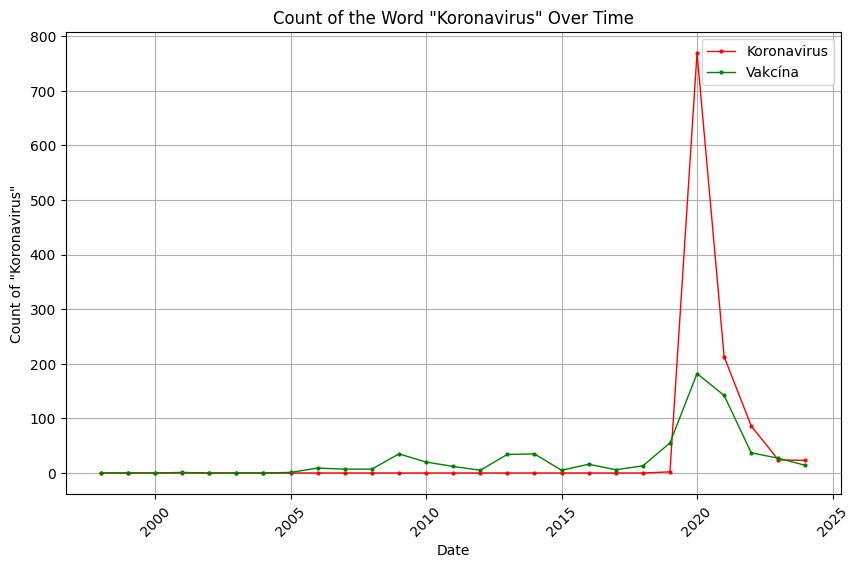

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(sorted_covid_words['date'], sorted_covid_words['covid_words_count'], 
         marker='o', color='red', linewidth=1, markersize=2, label="Koronavirus")
plt.plot(sorted_vaccina_words['date'], sorted_vaccina_words['vaccina_words_count'], 
         marker='o', color='green', linewidth=1, markersize=2, label='Vakcína')
plt.title('Count of the Word "Koronavirus" Over Time')
plt.xlabel('Date')
plt.ylabel('Count of "Koronavirus"')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

## 8. Vykreslete histogram pro počet článků v jednotlivech dnech týdne

In [43]:
# Get day of week for every article (0 = Monday, 6 = Sunday)
df_clean['day_of_week'] = df_clean['date'].dt.dayofweek

days_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_clean_sorted = df_clean.sort_values(by='day_of_week')
df_clean_sorted['day_of_week_name'] = df_clean_sorted['day_of_week'].apply(lambda x: days_names[x])

/var/folders/51/0prm0g2x0y13rpfcls9fpv180000gn/T/ipykernel_29008/1843776454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['day_of_week'] = df_clean['date'].dt.dayofweek


In [44]:
df_clean_sorted['day_of_week_name']

0         Monday
55494     Monday
55488     Monday
55486     Monday
55476     Monday
           ...  
102789    Sunday
38930     Sunday
108285    Sunday
120552    Sunday
32743     Sunday
Name: day_of_week_name, Length: 112524, dtype: object

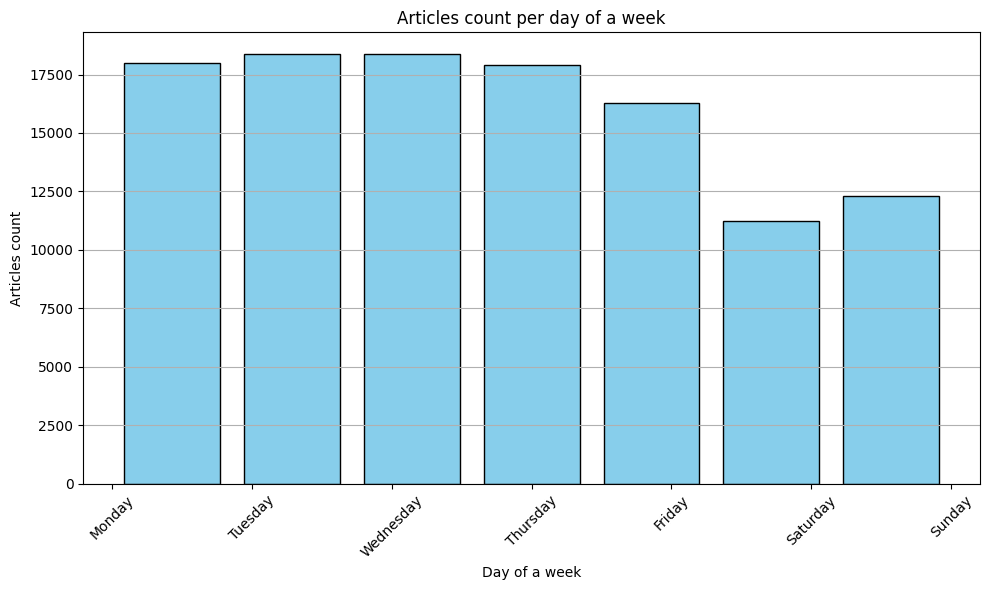

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(df_clean_sorted['day_of_week_name'], bins=7, color='skyblue', edgecolor='black', rwidth=0.8)

plt.title('Articles count per day of a week')
plt.xlabel('Day of a week')
plt.ylabel('Articles count')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()